# Import all the required libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [33]:
student_data = pd.read_excel('student_data.xlsx')
student_data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Some Statistics and Info from the Dataset

In [34]:
student_data.describe(include='all')

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [35]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


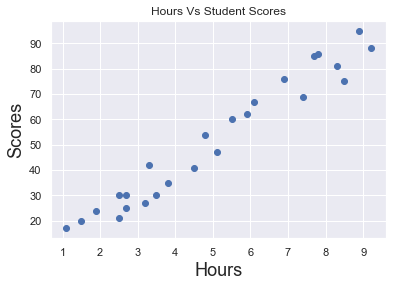

In [36]:
plt.scatter(x=student_data.Hours, y=student_data.Scores)
plt.xlabel('Hours', fontsize=18)
plt.ylabel('Scores', fontsize=18)
plt.title("Hours Vs Student Scores")
plt.show()

# Now lets do some preprocessing on our Dataset 

In [37]:
# So there are no null values
student_data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [38]:
# Get the mean value of a data
student_data.mean()

Hours      5.012
Scores    51.480
dtype: float64

In [39]:
# Splitting a dataset
x = student_data.drop('Scores', axis='columns')
y = student_data.drop('Hours', axis='columns')
print("The shape of x: ", x.shape)
print("The shape of y: ", y.shape)

The shape of x:  (25, 1)
The shape of y:  (25, 1)


# Now lets split the Dataset for training and testing purpose

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [42]:
# Getting the shape of training and testing Data.
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (20, 1)
Shape of x_test:  (5, 1)
Shape of y_train:  (20, 1)
Shape of y_test:  (5, 1)


# Now lets apply Machine Learning on the dataset

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
reg = LinearRegression()

In [45]:
reg.fit(x_train, y_train)

LinearRegression()

In [46]:
reg.coef_

array([[9.68207815]])

In [47]:
reg.intercept_

array([2.82689235])

In [48]:
reg.predict([[9.25]])[0][0].round(2)

92.39

In [49]:
y_predictions = reg.predict(x_test)
y_predictions

array([[83.18814104],
       [27.03208774],
       [27.03208774],
       [69.63323162],
       [59.95115347]])

In [50]:
# Now lets fill all these above info in one DataFrame format.
# np.c_ will goinfg to create our dataset in the column format.
reg_summary = pd.DataFrame(np.c_[x_test, y_test, y_predictions], columns=["Hours", "Original Marks", "Marks Predicted"])
reg_summary

,Hours,Original Marks,Marks Predicted
0,8.3,81.0,83.188141
1,2.5,30.0,27.032088
2,2.5,21.0,27.032088
3,6.9,76.0,69.633232
4,5.9,62.0,59.951153


# Final prediction

In [51]:
# Getting R-Squared value.
reg.score(x_test, y_test)

0.9678055545167994

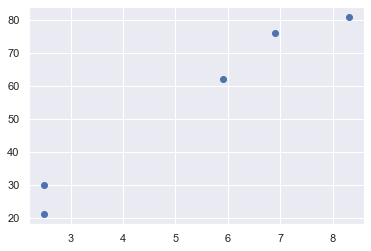

In [52]:
plt.scatter(x_test, y_test)

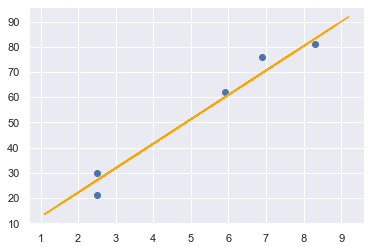

In [53]:
plt.scatter(x_test, y_test)
plt.plot(x_train, reg.predict(x_train), c='orange')
plt.show()

# Now Lets check for student studies for 9.25 hours

In [54]:
final_prediction = reg.predict([[9.25]])
final_prediction

array([[92.38611528]])

# Now Lets dump all the Data in one proper file

In [55]:
import joblib

In [56]:
joblib.dump(reg, "Students Percentage Prediction.pkl")

['Students Percentage Prediction.pkl']

In [57]:
final_model = joblib.load("Students Percentage Prediction.pkl")

In [58]:
final_model

LinearRegression()

In [59]:
model =final_model.predict([[9.25]])
model

array([[92.38611528]])

In [60]:
reg_summary_2 = pd.DataFrame(data=x.columns.values, columns=['Features'])
reg_summary_2['Weights'] = reg.coef_
reg_summary_2['Bias'] = reg.intercept_
reg_summary_2['Student Marks Predicted(9.25)'] = model
reg_summary_2

,Features,Weights,Bias,Student Marks Predicted(9.25)
0,Hours,9.682078,2.826892,92.386115


In [61]:
final_dataset_predicted = reg_summary_2.to_csv("Student Marks Predicted.csv")

In [62]:
final_dataset_predicted